#  método de separación de variables


<p>Use el método de separación de variables para resolver:</p>

$$
u_t(x,t) = u_{xx}(x,t), \quad 0 < x < 1, \quad t > 0,
$$

$$
u_x(0,t) = 0, \quad u_x(1,t) = 0, \quad t > 0
$$

$$
u(x,0) = f(x) = x, \quad 0 < x < 1.
$$


transformando las condiciones tenemos que
$$
U(x,t) = X(x)T(t)
$$

$$
U_x(x,t) = X_x(x)T(t)
$$

$$
U_x(0,t) = X_x(0)T(t) = 0
$$

$$
T(t) \neq 0
$$

$$
X_x(0) = 0
$$

$$
U_x(1,t) = X_x(1)T(t) = 0
$$

$$
T(t) \neq 0
$$

$$
X_x(1) = 0
$$

Importamos las librerias necesarias

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


 Función para la condición inicial

In [41]:
def recta(x):
    return x

In [42]:
x = np.linspace(0, 1, 100)  # Se redujo el tamaño para una mejor visualización
t = np.linspace(0, 1, 100)

X, T = np.meshgrid(x, t)


 Cálculo de coeficientes de la serie de Fourier en cosenos.

In [43]:
def coeficientes_Cn(N):
    Cn = np.zeros(N)
    for n in range(N):
        if n == 0:
            Cn[n] = 1/2  # Coeficiente para n=0 (media de la función)
        else:
            Cn[n] = (2 * (-1)**n) / (n * np.pi)  # Fórmula específica para x en [0,1]
    return Cn

Función para la solución u(x,t)

In [44]:
def u_x_t(x, t, N=50):
    Cn = coeficientes_Cn(N)
    f = np.zeros((len(t), len(x)))  # Transpuesta para coincidir con X, T
    for i in range(len(t)):
        for n in range(N):
            f[i, :] += Cn[n] * np.cos(n * np.pi * x) * np.exp(- (n * np.pi)**2 * t[i])
    return f

In [45]:
U = u_x_t(x, t)

 Graficar en 3D

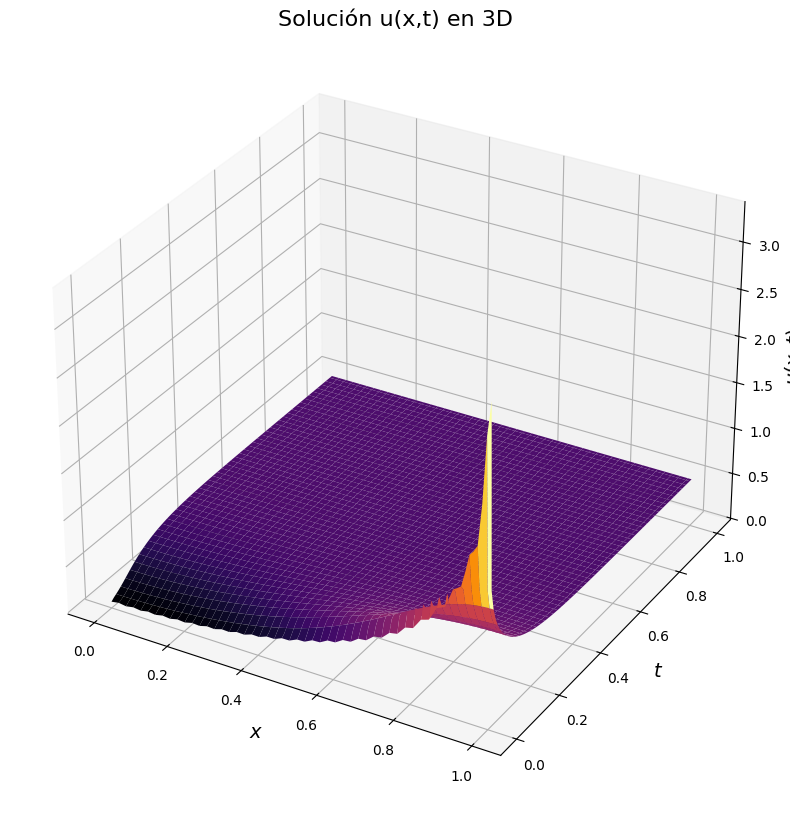

In [46]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(X, T, U, cmap="inferno")  # Mapa de color ajustado
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$t$', fontsize=14)
ax.set_zlabel('$u(x,t)$', fontsize=14)
plt.title("Solución u(x,t) en 3D", fontsize=16)

plt.show()